In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

# Araştırma Projesi Notları

  # EarlyStopping kullanın : https://keras.io/api/callbacks/early_stopping/
  # Dropout'lu versiyonun accuracy değerini dropout'suz versiyonun üzerine çıkarın!
  # Image augmentation uygulayarak veri çoğaltın. (Bunun için farklı bir img augmentation library'si kullanın!)
  # CNN modelinin 3 farklı versiyonunu geliştirin.
  # Hyperparameters üzerinde farklı varyasyonları deneyin.
  # Metric ve Optimizer için farklı varyasyonları deneyin.

In [ ]:
# Dataset : https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [ ]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
# Understand the Dataset

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
batch_size = 128
epochs = 15

IMG_WIDTH = 150
IMG_HEIGHT = 150

### Data Preparation

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


### Visualize Training Images

In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
len(sample_training_images)

128

In [ ]:
def PlotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

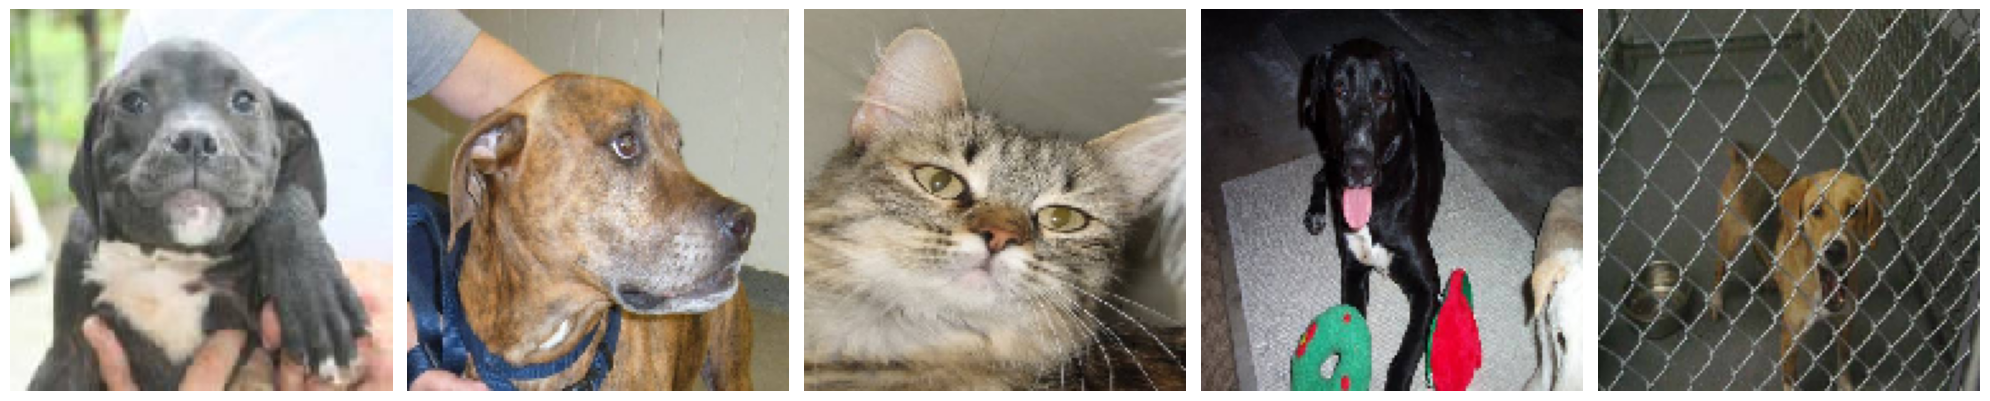

In [ ]:
PlotImages(sample_training_images[:5])

In [ ]:
# Build a Model

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        1

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val//batch_size
)

<ipython-input-18-c29a932442a0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
15/15 [==============================] - 13s 489ms/step - loss: 1.2803 - accuracy: 0.5021 - val_loss: 0.6931 - val_accuracy: 0.4933
Epoch 2/15
15/15 [==============================] - 6s 404ms/step - loss: 0.6931 - accuracy: 0.4968 - val_loss: 0.6930 - val_accuracy: 0.5145
Epoch 3/15
15/15 [==============================] - 6s 422ms/step - loss: 0.6930 - accuracy: 0.4995 - val_loss: 0.6924 - val_accuracy: 0.5022
Epoch 4/15
15/15 [==============================] - 6s 413ms/step - loss: 0.6902 - accuracy: 0.5027 - val_loss: 0.6885 - val_accuracy: 0.5045
Epoch 5/15
15/15 [==============================] - 6s 405ms/step - loss: 0.6831 - accuracy: 0.5139 - val_loss: 0.6800 - val_accuracy: 0.5011
Epoch 6/15
15/15 [==============================] - 5s 356ms/step - loss: 0.6634 - accuracy: 0.5540 - val_loss: 0.6577 - val_accuracy: 0.5569
Epoch 7/15
15/15 [==============================] - 6s 420ms/step - loss: 0.6426 - accuracy: 0.6074 - val_loss: 0.6799 - val_accuracy: 0.5078
Epoch

with dropout

- ilk satır : loss: 1.0040 - accuracy: 0.4904 - val_loss: 0.6931 - val_accuracy: 0.5045
- son satır : loss: 0.4122 - accuracy: 0.8018 - val_loss: 0.5518 - val_accuracy: 0.7299

without dropout

- ilk satır : loss: 0.9279 - accuracy: 0.5139 - val_loss: 0.6927 - val_accuracy: 0.4922
- son satır : loss: 0.0955 - accuracy: 0.9658 - val_loss: 0.8464 - val_accuracy: 0.7143

In [ ]:
model.save('model.h5')
# model.save('model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


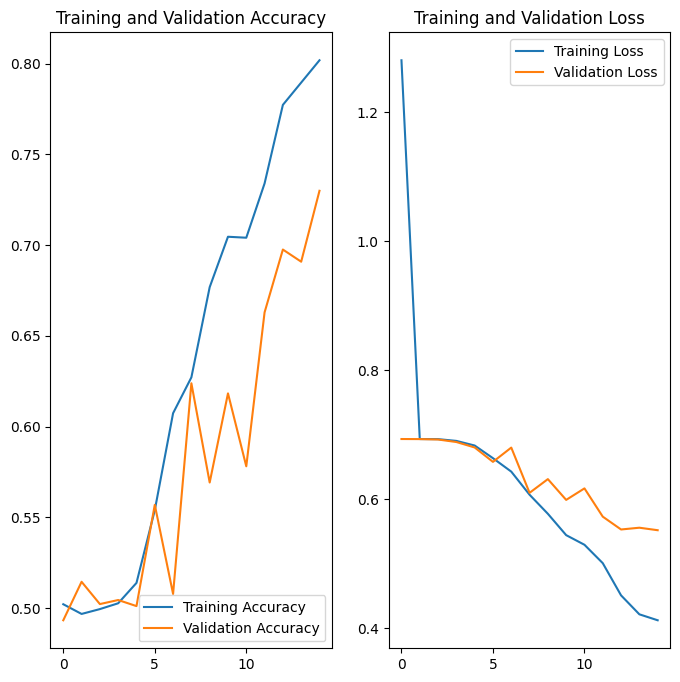

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()